In [51]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
sp = pd.read_csv('StudentsPerformance.csv')

In [15]:
sp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [16]:
titanic = pd.read_csv('titanic.csv')

In [17]:
titanic.shape

(891, 12)

In [18]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
sp[(sp['writing score'] > 80) & (sp.gender == 'female')]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
36,female,group D,associate's degree,standard,none,74,81,83
38,female,group D,associate's degree,free/reduced,completed,75,90,88
...,...,...,...,...,...,...,...,...
983,female,group A,some college,standard,completed,78,87,91
984,female,group C,some high school,standard,none,74,75,82
989,female,group D,some college,free/reduced,completed,67,86,83
995,female,group E,master's degree,standard,completed,88,99,95


In [21]:
# sp[sp['lunch'] == 'free/reduced']
sp['lunch'].value_counts(normalize=True)

standard        0.645
free/reduced    0.355
Name: lunch, dtype: float64

In [22]:
reduced_lunch = sp.loc[(sp['lunch'] == 'free/reduced')]

In [23]:
standart_lunch = sp.loc[(sp['lunch'] != 'free/reduced')]

In [24]:
sp = sp\
    .rename(columns={'parental level of education': 'parental_level_of_education',
                     'test preparation course': 'test_preparation_course',
                     'math score': 'math_score',
                     'reading score': 'reading_score',
                     'writing score': 'writing_score'})


In [25]:
writing_score_query = 78

In [26]:
sp.query("gender == 'female' & writing_score > @writing_score_query")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
36,female,group D,associate's degree,standard,none,74,81,83
38,female,group D,associate's degree,free/reduced,completed,75,90,88
...,...,...,...,...,...,...,...,...
983,female,group A,some college,standard,completed,78,87,91
984,female,group C,some high school,standard,none,74,75,82
989,female,group D,some college,free/reduced,completed,67,86,83
995,female,group E,master's degree,standard,completed,88,99,95


In [27]:
score_columns = [i for i in list(sp) if 'score' in i]
# we choose names of columns which consist score as prefix

In [28]:
sp.filter(like='score', axis='columns')

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [29]:
sp.groupby('gender', as_index=False).aggregate({'math_score': 'mean', 'reading_score': 'mean'}) \
    .rename(columns={'math_score': 'mean_math_score', 'reading_score': 'mean_reading_score'})


,gender,mean_math_score,mean_reading_score
0,female,63.633205,72.608108
1,male,68.728216,65.473029


In [30]:
mean_scores = sp.groupby(['gender', 'race/ethnicity']).aggregate({'math_score' : 'mean', 'reading_score' : 'mean'}) \
    .rename(columns={'math_score' : 'mean_math_score', 'reading_score' : 'mean_reading_score'})
mean_scores

mean_math_score  mean_reading_score
gender race/ethnicity                                     
female group A               58.527778           69.000000
       group B               61.403846           71.076923
       group C               62.033333           71.944444
       group D               65.248062           74.046512
       group E               70.811594           75.840580
male   group A               63.735849           61.735849
       group B               65.930233           62.848837
       group C               67.611511           65.424460
       group D               69.413534           66.135338
       group E               76.746479           70.295775

In [31]:
mean_scores.loc[[('female', 'group B'), ('female', 'group D'), ('male', 'group C')]]


mean_math_score  mean_reading_score
gender race/ethnicity                                     
female group B               61.403846           71.076923
       group D               65.248062           74.046512
male   group C               67.611511           65.424460

In [32]:
mean_scores = sp.groupby(['gender', 'race/ethnicity'], as_index=False).aggregate({'math_score' : 'mean', 'reading_score' : 'mean'}) \
    .rename(columns={'math_score' : 'mean_math_score', 'reading_score' : 'mean_reading_score'})
mean_scores

,gender,race/ethnicity,mean_math_score,mean_reading_score
0,female,group A,58.527778,69.000000
1,female,group B,61.403846,71.076923
2,female,group C,62.033333,71.944444
3,female,group D,65.248062,74.046512
4,female,group E,70.811594,75.840580
5,male,group A,63.735849,61.735849
6,male,group B,65.930233,62.848837
7,male,group C,67.611511,65.424460
8,male,group D,69.413534,66.135338
9,male,group E,76.746479,70.295775


In [33]:
sp.groupby(['gender', 'race/ethnicity']).math_score.nunique()

gender  race/ethnicity
female  group A           29
        group B           51
        group C           59
        group D           53
        group E           44
male    group A           38
        group B           43
        group C           56
        group D           49
        group E           38
Name: math_score, dtype: int64

In [34]:
sp.sort_values(['gender', 'race/ethnicity'], ascending=False)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
34,male,group E,some college,standard,none,97,87,82
35,male,group E,associate's degree,standard,completed,81,81,79
50,male,group E,some college,standard,none,53,55,48
51,male,group E,associate's degree,free/reduced,completed,77,69,68
60,male,group E,bachelor's degree,free/reduced,completed,79,74,72
...,...,...,...,...,...,...,...,...
960,female,group A,some college,standard,none,56,58,64
972,female,group A,high school,free/reduced,completed,53,50,60
974,female,group A,some college,standard,none,54,63,67
983,female,group A,some college,standard,completed,78,87,91


In [35]:
sp['total_score'] = sp.math_score + sp.reading_score + sp.writing_score

In [36]:
sp = sp.assign(total_score_log = np.log(sp.total_score))

In [37]:
sp.drop(['total_score', 'lunch'], axis='columns')

,gender,race/ethnicity,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score,total_score_log
0,female,group B,bachelor's degree,none,72,72,74,5.384495
1,female,group C,some college,completed,69,90,88,5.509388
2,female,group B,master's degree,none,90,95,93,5.627621
3,male,group A,associate's degree,none,47,57,44,4.997212
4,male,group C,some college,none,76,78,75,5.433722
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88,99,95,5.641907
996,male,group C,high school,none,62,55,55,5.147494
997,female,group C,high school,completed,59,71,65,5.273000
998,female,group D,some college,completed,68,78,77,5.407172


In [111]:
dota_heroes = pd.read_csv('dota_hero_stats.csv')

In [39]:
dota_heroes.head(5)

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [40]:
dota_heroes.groupby(['legs']).count()

,Unnamed: 0,attack_type,id,localized_name,name,primary_attr,roles
legs,,,,,,,
0,11,11,11,11,11,11,11
2,95,95,95,95,95,95,95
4,7,7,7,7,7,7,7
6,3,3,3,3,3,3,3
8,1,1,1,1,1,1,1


In [41]:
dota_heroes.groupby('legs', as_index=False).aggregate({'legs' : 'value_counts'}).sort_index().rename(columns={'legs' : 'nLegs'})

,nLegs
0,11
1,95
2,7
3,3
4,1


In [42]:
lp = pd.read_csv('accountancy.csv')
lp.head(5)

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


In [43]:
lp.groupby(['Executor', 'Type']).aggregate({'Salary' : 'mean'})

Salary
Executor Type            
Loopa    A      58.000000
         B     145.166667
         C     154.333333
         D     137.714286
         E     164.000000
         F     238.000000
Pupa     A     160.833333
         B      77.000000
         C      74.500000
         D     146.500000
         E     131.200000
         F     136.250000

In [44]:
lp.drop('Unnamed: 0', axis=1) \
    .groupby(['Type', 'Executor'], as_index=False) \
    .mean() \
    .sort_values(['Type', 'Salary'], ascending=[True, False]) \
    .groupby('Type') \
    .head(1)

,Type,Executor,Salary
1,A,Pupa,160.833333
2,B,Loopa,145.166667
4,C,Loopa,154.333333
7,D,Pupa,146.500000
8,E,Loopa,164.000000
10,F,Loopa,238.000000


In [45]:
dota_heroes.head(5)

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [48]:
dota_heroes.groupby(['attack_type', 'primary_attr']).count()

Unnamed: 0  id  legs  localized_name  name  roles
attack_type primary_attr                                                   
Melee       agi                   19  19    19              19    19     19
            int                    2   2     2               2     2      2
            str                   35  35    35              35    35     35
Ranged      agi                   18  18    18              18    18     18
            int                   40  40    40              40    40     40
            str                    3   3     3               3     3      3

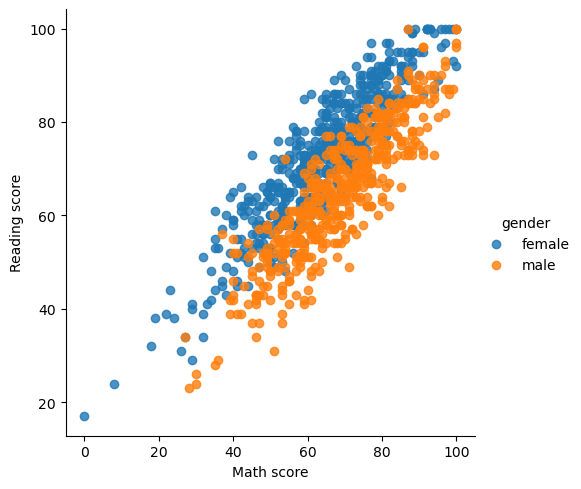

In [59]:
ax = sns.lmplot(x='math_score', y='reading_score',
                hue='gender', fit_reg=False, data=sp)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')


In [86]:
gen = pd.read_csv('genome_matrix.csv')
gen.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


In [ ]:
gen.heatmap = gen.pivot('species')

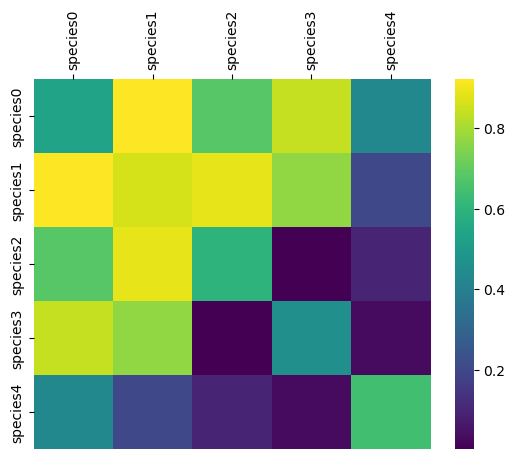

In [90]:
g = sns.heatmap(gen, cmap='viridis')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

In [107]:
import regex as re

In [108]:
dota_heroes.dtypes

Unnamed: 0         int64
attack_type       object
id                 int64
legs               int64
localized_name    object
name              object
primary_attr      object
roles              int64
nRoles             int64
dtype: object

In [110]:
dota_heroes.head(3)

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles,nRoles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,3,117
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,4,117
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,4,117


In [112]:
dota_heroes['nRoles'] = dota_heroes['roles'].str.split(',').str.len()
dota_heroes.head(5)


,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles,nRoles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']",3
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']",4
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']",4
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini...",5
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']",4


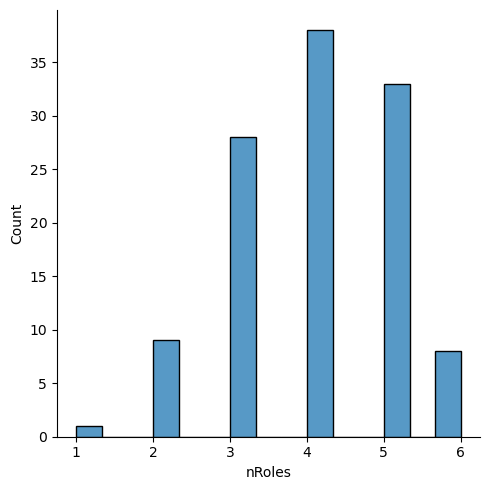

In [114]:
sns.displot(dota_heroes['nRoles'], bins=15)

In [115]:
ir = pd.read_csv('iris.csv')
ir.head(5)

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [129]:
# ir.rename(columns={'new column name':'ncb'}, inplace=True)
# ir.drop(['ncb'], axis=1)
ir_f = ir.iloc[:,1:-1]

ir_f.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Axes: ylabel='Density'>

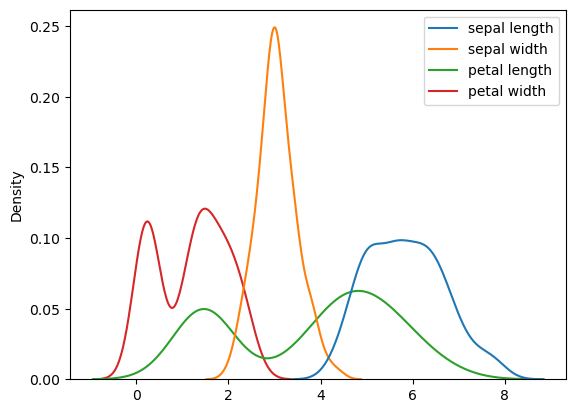

In [130]:
sns.kdeplot(data=ir_f)

<Axes: >

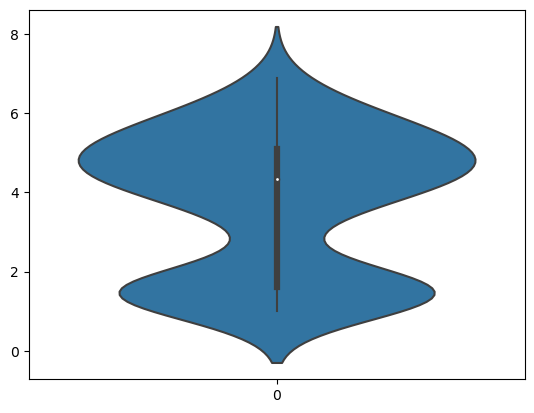

In [135]:
sns.violinplot(data=ir_f['petal length'])

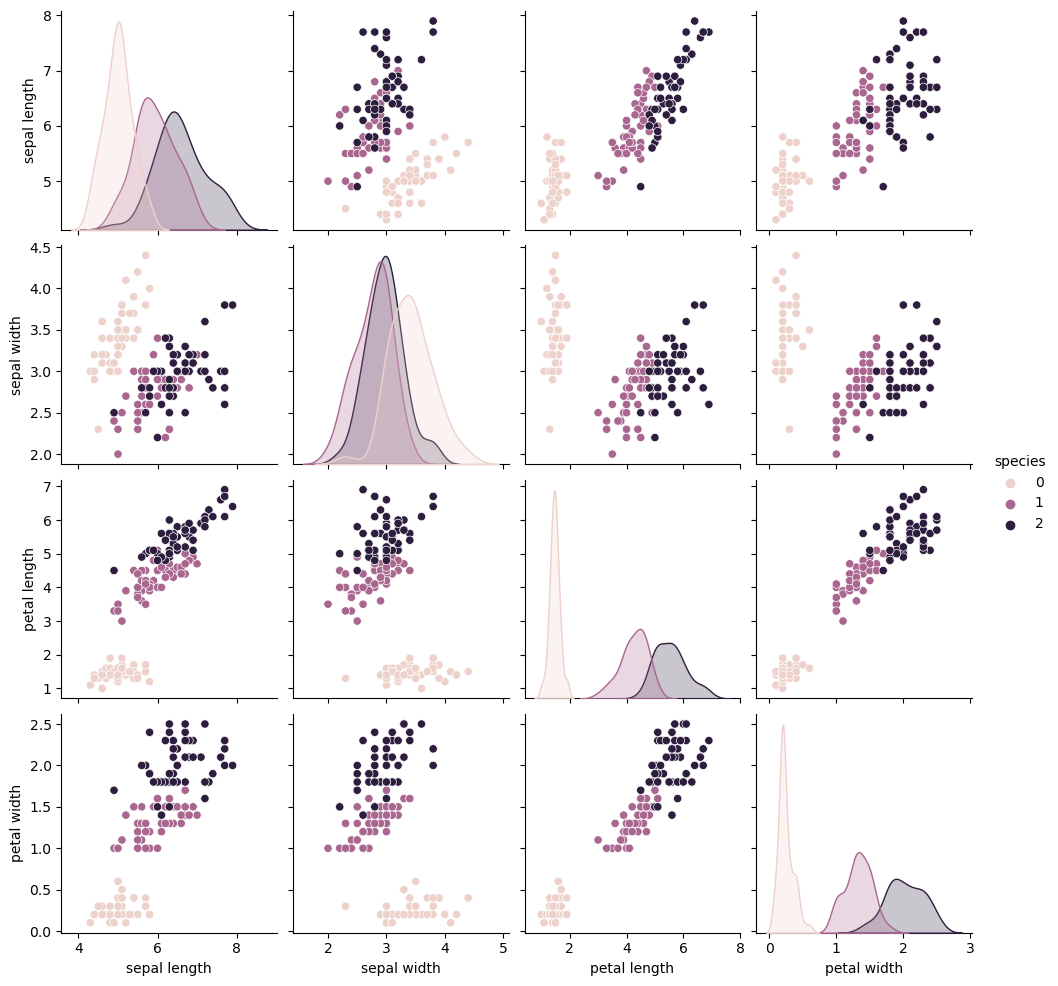

In [136]:
sns.pairplot(data=ir.iloc[:,1:], hue='species')

<Axes: >

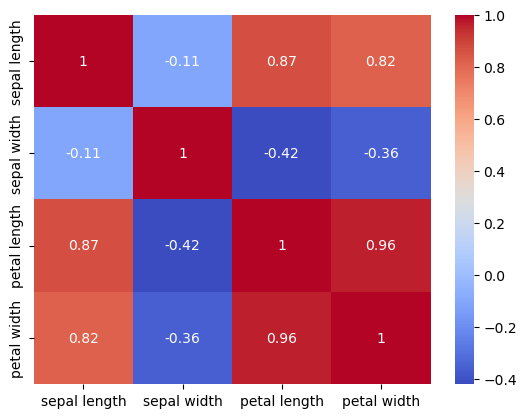

In [138]:
sns.heatmap(ir_f.corr(), annot=True, cmap='coolwarm')

In [99]:
type(dota_heroes.roles[0])

str

In [79]:
gen.head()

,Unnamed: 0,species0,species1,species2,species3,species4
0,species0,0.536029,0.920292,0.679708,0.840606,0.430842
1,species1,0.920292,0.862417,0.887593,0.769754,0.203214
2,species2,0.679708,0.887593,0.595156,0.003435,0.096052
3,species3,0.840606,0.769754,0.003435,0.458870,0.029251
4,species4,0.430842,0.203214,0.096052,0.029251,0.642109
